# Implementing a basic Temporal Learning (TD(0)) algorithm 

## 1. Setup libraries and imports

In [19]:
import sys
import os

# Add META-RL-SNAKE (project root) to path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from meta_snake_rl.env.snake_env import SnakeEnv, select_action, get_state
from meta_snake_rl.utils.constants import ACTIONS, OPPOSITE

## 2. TD(0) Hyperparameters and Q-table initializations

In [21]:
# Q-Table
Q = {}

# Training hyperparameters
alpha, gamma, epsilon, min_epsilon, decay_rate, episodes = 0.1, 0.95, 1.0, 0.01, 0.9985, 5000

# Metrics logging
#episode_rewards = []

## 3. Environment Creation

In [22]:
env = SnakeEnv(grid_size=15, variant="classic")

## 4. Training Loop 



### Code for loop

In [23]:
def sarsa_training_loop(alpha, gamma, epsilon, min_epsilon, decay_rate, episodes, episode_rewards):
    for episode in range(episodes):
        total_reward = 0
        env.reset()
        state = get_state(env.snake, env.apple, env.direction, env.grid_size)
        direction = env.direction
        done = False
        action = select_action(Q, state, epsilon, direction)

        while not done:
            _, reward, done, _ = env.step(action)
            next_state = get_state(env.snake, env.apple, env.direction, env.grid_size)
            next_direction = env.direction
            next_action = select_action(Q, next_state, epsilon, next_direction)

            if state not in Q:
                Q[state] = {a: 0 for a in ACTIONS}
            if next_state not in Q:
                Q[next_state] = {a: 0 for a in ACTIONS}
            
            # SARSA update
            old_q = Q[state][action]
            new_q = Q[next_state][next_action]
            Q[state][action] += alpha * (reward + gamma * new_q - old_q)

            # Move to next
            state = next_state
            action = next_action
            direction = next_direction
            total_reward += reward

        episode_rewards.append(total_reward)
        epsilon = max(min_epsilon, epsilon * decay_rate)

        # if episode % 50 == 0:
        #     print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")
    
    return episode_rewards

### Code for MatPlotLib Display


In [24]:
def plot_rewards_progress(episode_rewards):
    plt.figure(figsize=(12, 6))
    plt.plot(episode_rewards, label='Episode Reward')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("SARSA Training Progress")
    plt.grid(True)
    plt.legend()
    plt.show()

# 5. Applying Hyperparameter Optimization Techniques

## 5a. Random Search

In [25]:
import random 
from tqdm.notebook import tqdm

ALPHA_RANGE = (0.1, 0.4)
GAMMA_RANGE = (0.9, 0.99)
DECAY_RANGE = (0.995, 0.9995)

N_TRIALS = 50
EPISODES = 2000
TOP_N = 5

results = []

for _ in tqdm(range(N_TRIALS), desc = "Random Search"):
    alpha = round(random.uniform(*ALPHA_RANGE), 3)
    gamma = round(random.uniform(*GAMMA_RANGE), 3)
    decay = round(random.uniform(*DECAY_RANGE), 5)

    # Reset Q-table
    Q = {}

    episode_rewards = []
    env.reset()
    sarsa_training_loop(
        alpha=alpha,
        gamma=gamma,
        epsilon=1.0, 
        min_epsilon=0.01,
        decay_rate=decay,
        episodes=EPISODES,
        episode_rewards=episode_rewards
    )

    # Calculate moving average for reward for the last 100 episodes
    avg_reward = sum(episode_rewards[-100:]) / 100
    results.append((avg_reward, alpha, gamma, decay))
    print(f"[{len(results)}/{N_TRIALS}] α={alpha}, γ={gamma}, decay={decay} → avg_reward={avg_reward:.2f}")

# Sort it based on avg_reward
results.sort(reverse=True)
print("\n Top configs:")
for avg, a, g, d in results[:TOP_N]:
    print(f"α={a}, γ={g}, decay={d} → avg_reward={avg:.2f}")


Random Search:   0%|          | 0/50 [00:00<?, ?it/s]

[1/50] α=0.359, γ=0.97, decay=0.99921 → avg_reward=2.44
[2/50] α=0.191, γ=0.941, decay=0.99788 → avg_reward=16.67
[3/50] α=0.36, γ=0.901, decay=0.99738 → avg_reward=16.39
[4/50] α=0.241, γ=0.974, decay=0.996 → avg_reward=16.67
[5/50] α=0.144, γ=0.958, decay=0.99592 → avg_reward=15.92
[6/50] α=0.184, γ=0.983, decay=0.99793 → avg_reward=15.73
[7/50] α=0.383, γ=0.903, decay=0.99892 → avg_reward=4.53
[8/50] α=0.242, γ=0.934, decay=0.99592 → avg_reward=15.96
[9/50] α=0.192, γ=0.942, decay=0.99702 → avg_reward=17.58
[10/50] α=0.336, γ=0.962, decay=0.99567 → avg_reward=9.71
[11/50] α=0.136, γ=0.97, decay=0.99872 → avg_reward=10.41
[12/50] α=0.156, γ=0.918, decay=0.99526 → avg_reward=16.71
[13/50] α=0.138, γ=0.903, decay=0.99729 → avg_reward=17.38
[14/50] α=0.151, γ=0.962, decay=0.99542 → avg_reward=15.62
[15/50] α=0.219, γ=0.971, decay=0.99906 → avg_reward=5.33
[16/50] α=0.117, γ=0.988, decay=0.99746 → avg_reward=16.37
[17/50] α=0.289, γ=0.951, decay=0.99799 → avg_reward=13.19
[18/50] α=0.207

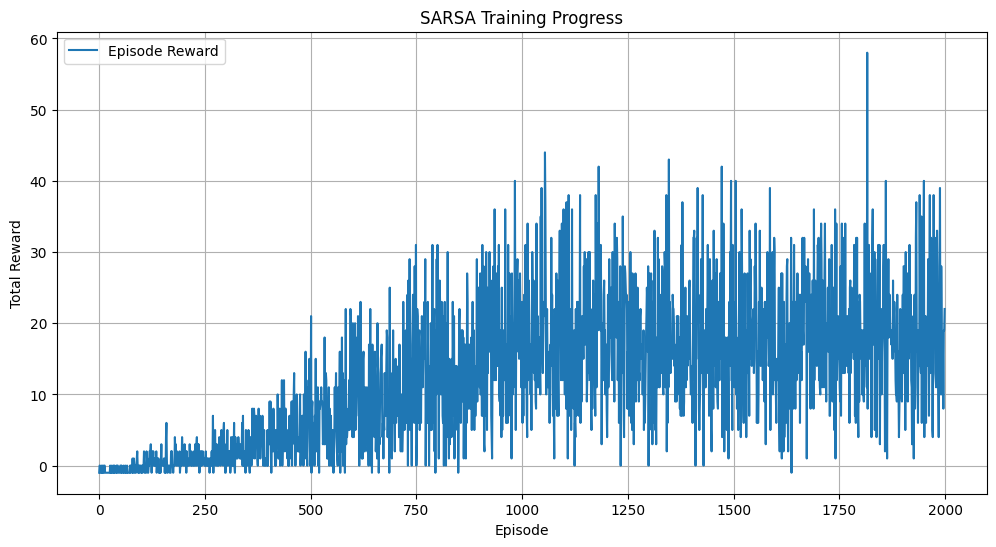

In [27]:
Q = {}
alpha, gamma, epsilon, min_epsilon, decay_rate, episodes = 0.104, 0.981, 1.0, 0.01, 0.99592, 2000
episode_rewards_2 = []
episode_rewards_2 = sarsa_training_loop(alpha, gamma, epsilon, min_epsilon, decay_rate, episodes, episode_rewards_2)
plot_rewards_progress(episode_rewards_2)